In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In this project, we are going to examine the relationship between apartment **prices** and **size** in `Distrito Federal`, a state in Mexico. We will equally train a model that will predict the price of an apartment using the given size of the apartment.

## Prepare Data

### Import `mexico-city-real-estate-clean.csv` data

In [2]:
# Import data
df = pd.read_csv("data/mexico-city-real-estate-clean.csv")

df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,289775.66,54.0,23.634501,-102.552788,Miguel Hidalgo
1,48822.82,100.0,19.279771,-99.234597,Tlalpan
2,232663.51,87.0,19.432657,-99.177444,Miguel Hidalgo
3,166001.78,100.0,19.367025,-99.170349,Benito Juárez
4,94022.66,57.0,23.634501,-102.552788,Benito Juárez


### Explore

Summary statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        9330 non-null   float64
 1   surface_covered_in_m2  9330 non-null   float64
 2   lat                    8716 non-null   float64
 3   lon                    8716 non-null   float64
 4   borough                9330 non-null   object 
dtypes: float64(4), object(1)
memory usage: 364.6+ KB


In [4]:
df.shape

(9330, 5)

In [5]:
df.describe()

,price_aprox_usd,surface_covered_in_m2,lat,lon
count,9330.000000,9330.000000,8716.000000,8716.000000
mean,102312.097460,76.483923,19.475876,-99.218778
std,72695.214533,18.652460,0.583719,0.494950
min,7823.940000,50.000000,19.194247,-102.552788
25%,46902.090000,61.000000,19.365558,-99.182964
50%,77712.560000,71.000000,19.393714,-99.159454
75%,142253.500000,90.000000,19.437506,-99.137094
max,395000.000000,130.000000,23.634501,-90.488467


Explore the relationship between price, `"price_aprox_usd"` and area `"surface_covered_in_m2"` using a scatter plot.

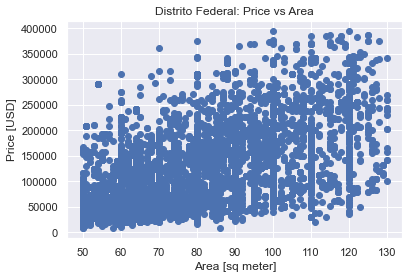

In [6]:
plt.scatter(x=df["surface_covered_in_m2"], y=df["price_aprox_usd"])

# Add axis labels
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")

# Add title
plt.title("Distrito Federal: Price vs Area")

# save as an image
plt.savefig("images/2-1.png", dpi=150)

Explore the distribution of apartments bu sizes using a histogram of `"surface_covered_in_m2"`

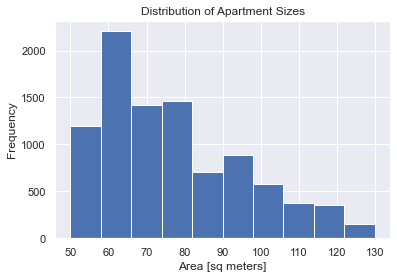

In [7]:
# Build histogram
plt.hist(
    df["surface_covered_in_m2"]
)


# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Apartment Sizes")

# save as an image
plt.savefig("images/2-2.png", dpi=150)

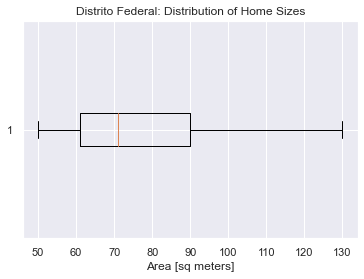

In [8]:
# Build box plot

plt.boxplot(
     df["surface_covered_in_m2"],
    vert=False
)


# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distrito Federal: Distribution of Home Sizes")

# save as an image
plt.savefig("images/2-3.png", dpi=150)

Check if there are `NaN`values in the `surface_covered_in_m2` column

In [9]:
df.isnull().sum()

price_aprox_usd            0
surface_covered_in_m2      0
lat                      614
lon                      614
borough                    0
dtype: int64

### Split

Split the dataset into feature matrix and target vector. The only feature here is `"surface_covered_in_m2"` while the target is `"price_aprox_usd"`

In [10]:
df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,289775.66,54.0,23.634501,-102.552788,Miguel Hidalgo
1,48822.82,100.0,19.279771,-99.234597,Tlalpan
2,232663.51,87.0,19.432657,-99.177444,Miguel Hidalgo
3,166001.78,100.0,19.367025,-99.170349,Benito Juárez
4,94022.66,57.0,23.634501,-102.552788,Benito Juárez


In [11]:
feature = ["surface_covered_in_m2"]

target = "price_aprox_usd"

X_train = df[feature]
y_train = df[target]

In [12]:
X_train.head()

,surface_covered_in_m2
0,54.0
1,100.0
2,87.0
3,100.0
4,57.0


In [13]:
y_train.head()

0    289775.66
1     48822.82
2    232663.51
3    166001.78
4     94022.66
Name: price_aprox_usd, dtype: float64

## Build Model

 ### Model Baseline

The baseline is the price the model will predict irrespective of the size

In [14]:
y_mean = round(y_train.mean(), 1)
y_mean

102312.1

Prediction List

In [15]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[102312.1, 102312.1, 102312.1, 102312.1, 102312.1]

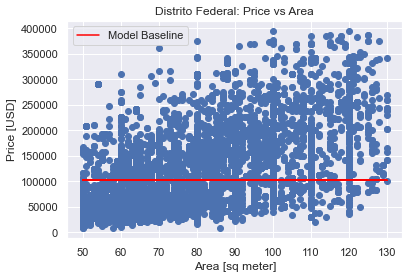

In [16]:
# Baseline scatter plot
plt.plot(X_train, y_pred_baseline, label = "Model Baseline", color="red")

plt.scatter(x=df["surface_covered_in_m2"], y=df["price_aprox_usd"])

# Add axis labels
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")

# Add title
plt.title("Distrito Federal: Price vs Area")

plt.legend()

# save as an image
plt.savefig("images/2-4.png", dpi=150)

Calculate Performance Metric: Baseline Mean Absolute Error

In [17]:
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Apartment Price: ",round(y_mean, 2))
print("Baseline MAE: ",round(baseline_mae, 2))

Mean Apartment Price:  102312.1
Baseline MAE:  57569.99


### Iterate

Instantiate a `Linear Regression` model

In [18]:
model = LinearRegression()

Train the model: Fit the model training data

In [19]:
model.fit(X_train, y_train)

LinearRegression()

Check if the model is fitted

In [20]:
check_is_fitted(model)

### Evaluate Model

Evaluate the model to see how it performs against the data it saw during training.

In [21]:
# Generate predictions
y_pred_training = model.predict(X_train)
y_pred_training

array([ 53073.15854489, 153811.41526521, 125341.9079312 , ...,
        61833.00695535,  66212.93116058, 197610.65731752])

Training Mean Absolute Error

In [22]:
training_mae = mean_absolute_error(y_train, y_pred_training)
print(f"Training MAE: {round(training_mae, 2)}")

Training MAE: 46358.33


Check the model performance on the test set, the dataset that the model has not seen before.

In [23]:
X_test = pd.read_csv("test/mexico-city-real-estate-test-features.csv")[feature]

X_test.head()

,surface_covered_in_m2
0,60.0
1,55.0
2,50.0
3,60.0
4,74.0


In [24]:
y_pred_test = pd.Series(model.predict(X_test))

y_pred_test.head()

0    66212.931161
1    55263.120648
2    44313.310134
3    66212.931161
4    96872.400597
dtype: float64

## COMMUNICATE RESULTS

**Extract model Intercept**

In [25]:
intercept = round(model.intercept_, 2)
intercept

-65184.79

**Extract Model Coefficient**

In [26]:
coefficient = round(model.coef_[0], 2)
coefficient

2189.96

**Model Equattion**

y = intercept + (coefficient * surface_covered_in_m2)

In [27]:
print(f"y = {intercept} + ({coefficient} * surface_covered_in_m2)")

y = -65184.79 + (2189.96 * surface_covered_in_m2)


### **Visualize:** Plot Model

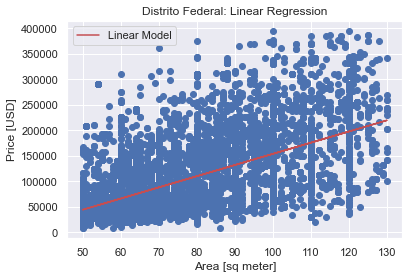

In [28]:
plt.plot(X_train, model.predict(X_train), color = "r", label = "Linear Model")

plt.scatter(X_train, y_train)

# Add axis labels
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")

# Add title
plt.title("Distrito Federal: Linear Regression")

plt.legend()

# save as an image
plt.savefig("images/1-5.png", dpi=150)